In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
air_quality = pd.read_csv("Desktop/air_quality_no2.csv")
air_quality

,datetime,station_antwerp,station_paris,station_london
0,2019-05-07 02:00:00,NaN,NaN,23.0
1,2019-05-07 03:00:00,50.5,25.0,19.0
2,2019-05-07 04:00:00,45.0,27.7,19.0
3,2019-05-07 05:00:00,NaN,50.4,16.0
4,2019-05-07 06:00:00,NaN,61.9,NaN
...,...,...,...,...
1030,2019-06-20 22:00:00,NaN,21.4,NaN
1031,2019-06-20 23:00:00,NaN,24.9,NaN
1032,2019-06-21 00:00:00,NaN,26.5,NaN
1033,2019-06-21 01:00:00,NaN,21.8,NaN


In [5]:
air_quality["datetime"].min(), air_quality["datetime"].max()

('2019-05-07 02:00:00', '2019-06-21 02:00:00')

<AxesSubplot:>

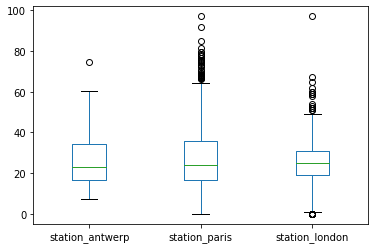

In [6]:
air_quality.plot.box()

<AxesSubplot:>

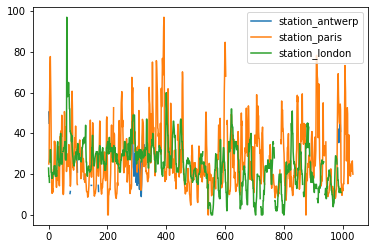

In [7]:
air_quality.plot()

<AxesSubplot:xlabel='amount', ylabel='degree'>

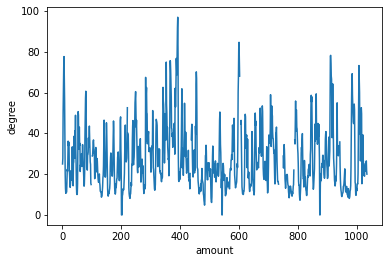

In [8]:
plt.xlabel("amount")
plt.ylabel("degree")
air_quality["station_paris"].plot()

<AxesSubplot:xlabel='station_london', ylabel='station_paris'>

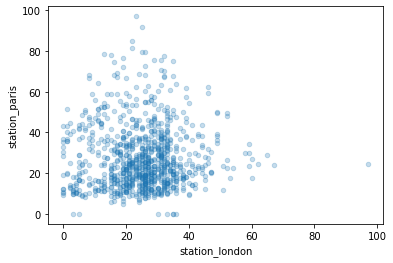

In [9]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.25)

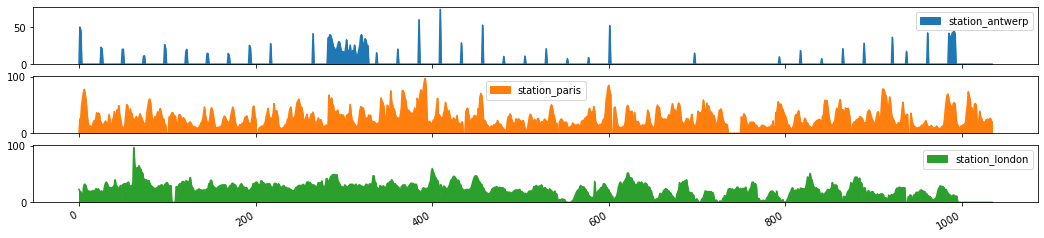

In [10]:
axs = air_quality.plot.area(figsize=(18, 4), subplots=True)

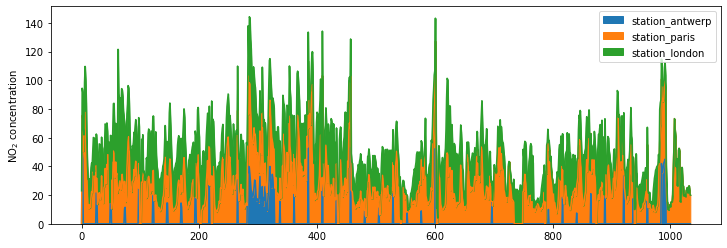

In [11]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.plot.area(ax=axs)
axs.set_ylabel("NO$_2$ concentration")
fig.savefig("no2_concentrations.png")

In [12]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

,datetime,station_antwerp,station_paris,station_london,london_mg_per_cubic
0,2019-05-07 02:00:00,NaN,NaN,23.0,43.286
1,2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2,2019-05-07 04:00:00,45.0,27.7,19.0,35.758
3,2019-05-07 05:00:00,NaN,50.4,16.0,30.112
4,2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [13]:
air_quality["ratio_paris_antwerp"] = (air_quality["station_paris"] / air_quality["station_antwerp"])
air_quality.head()

,datetime,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
0,2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
1,2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2,2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
3,2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
4,2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [14]:
air_quality_renamed = air_quality.rename(columns={ "station_antwerp": "BETR801","station_paris": "FR04014","station_london": "London Westminster", } )
air_quality_renamed.head()

,datetime,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
0,2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
1,2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2,2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
3,2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
4,2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [15]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)
air_quality_renamed.head()

,datetime,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
0,2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
1,2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2,2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
3,2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
4,2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


In [16]:
air_quality_no2 = pd.read_csv("Desktop/air_quality_no2_long.csv")
air_quality_no2 = air_quality_no2[["date.utc", "location", "parameter", "value"]]
air_quality_no2.head()

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


In [17]:
air_quality_no2 = air_quality_no2.rename(columns={"date.utc": "datetime"})
air_quality_no2.head()

,datetime,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4
